<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/review_220420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cd /root

/root


In [4]:
!mkdir data
from google.colab import files
files.upload()

Saving sonar.csv to sonar.csv


{'sonar.csv': b'0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R\n0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R\n0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.861

In [7]:
df = pd.read_csv('/root/sonar.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [11]:
X = df.values[:,:-1].astype(np.float32)
Y = df.values[:, -1]

print(X.dtype) #-> 기존 object
print(Y.dtype)

float32
object


In [12]:
e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
model = keras.Sequential()
model.add(keras.layers.Dense(24, input_dim = 60, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                1464      
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'binary_crossentropy',  
              optimizer = 'adam',
              metrics = 'accuracy')

In [15]:
model.fit(X,Y, epochs = 20, batch_size = 20)

Epoch 1/20
11/11 [==============================] - 1s 4ms/step - loss: 0.6894 - accuracy: 0.5721
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5433
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5625
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.6394
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6538
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7019
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6731
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6779
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6971
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.7212
Epoch 11/20
11/11 [

In [ ]:
model.save('my_model.h5')

model_loaded = keras.models.load_model('') ## 모델 save/불러오기

In [16]:
files.upload()

Saving wine.csv to wine.csv


{'wine.csv': b'7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5,1\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7,1\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7,1\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,1\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5,1\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,1\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5,1\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5,1\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5,1\n8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2,5,1\n8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5,7,1\n8.1,0.56,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3,5,1\n7.4

In [18]:
# 와인분류
df = pd.read_csv('/root/wine.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [44]:
X = df.values[:, :-1].astype(np.float32)
Y = df.values[:, -1].astype(np.int32)

print(X.shape)

(6497, 12)


In [53]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 12, activation = 'relu'))
#model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                390       
                                                                 
 dense_26 (Dense)            (None, 8)                 248       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 647
Trainable params: 647
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [23]:
#저장경로 만들기
import os
if not os.path.exists('./model/'):
  os.mkdir('./model/')

In [52]:
#저장경로 삭제(디렉토리 자체를 삭제)
import shutil
shutil.rmtree('./model')

In [55]:
## 체크포인트 만들기 좋아지면 epoch와 val_loss 저장
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath = modelpath,
                                             monitor = 'val_loss',
                                             verbose = 1,
                                             save_best_only = True)

# 10번정도 안좋아지면 세워라!
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

In [56]:
history = model.fit(X,Y ,validation_split = 0.2, epochs = 1000,
                    batch_size = 500, verbose = 1,
                    callbacks = [checkpoint, early_stopping])

Epoch 1/1000
 1/11 [=>............................] - ETA: 3s - loss: 13.4893 - accuracy: 0.3000
Epoch 1: val_loss improved from inf to 7.48258, saving model to ./model/01-7.4826.hdf5
11/11 [==============================] - 1s 15ms/step - loss: 10.0658 - accuracy: 0.3077 - val_loss: 7.4826 - val_accuracy: 0.0000e+00
Epoch 2/1000
 1/11 [=>............................] - ETA: 0s - loss: 5.6534 - accuracy: 0.3460
Epoch 2: val_loss improved from 7.48258 to 1.34552, saving model to ./model/02-1.3455.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 3.8584 - accuracy: 0.3042 - val_loss: 1.3455 - val_accuracy: 0.4215
Epoch 3/1000
 1/11 [=>............................] - ETA: 0s - loss: 1.4246 - accuracy: 0.4060
Epoch 3: val_loss improved from 1.34552 to 0.05795, saving model to ./model/03-0.0580.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 0.7347 - accuracy: 0.6581 - val_loss: 0.0580 - val_accuracy: 0.9931
Epoch 4/1000
 1/11 [=>...........................

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

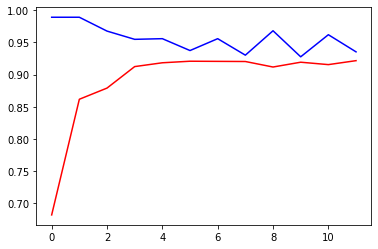

In [43]:
plt.plot(history.history['accuracy'], c= 'r')
plt.plot(history.history['val_accuracy'], c = 'b')
plt.show()
#비정상으로 나옴 validation 0.3

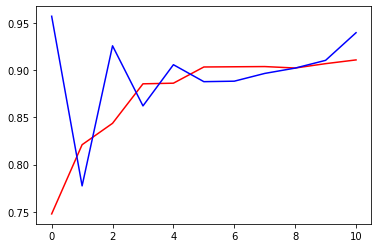

In [51]:
# layer 삭제한것 
plt.plot(history.history['accuracy'], c= 'r')
plt.plot(history.history['val_accuracy'], c = 'b')
plt.show()

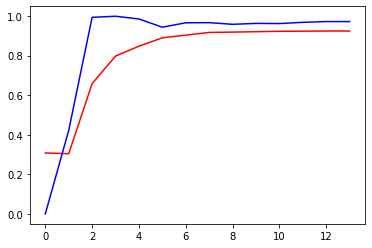

In [57]:
##layer 삭제 후 validation 0.2
plt.plot(history.history['accuracy'], c= 'r')
plt.plot(history.history['val_accuracy'], c = 'b')
plt.show()

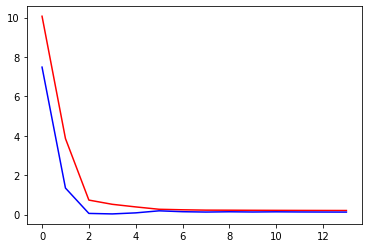

In [58]:
plt.plot(history.history['loss'], c= 'r')
plt.plot(history.history['val_loss'], c = 'b')
plt.show()

In [59]:
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00\n 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60\n 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70\n 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40\n 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20\n 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70\n 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90\n 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10\n 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50\n 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90\n 0

In [60]:
df = pd.read_csv('/root/housing.csv', header = None, delim_whitespace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
X = df.values[:, :-1].astype(np.float32)
Y = df.values[:, -1].astype(np.float32)

In [67]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 13, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear')) # linear 주의!

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 30)                420       
                                                                 
 dense_32 (Dense)            (None, 6)                 186       
                                                                 
 dense_33 (Dense)            (None, 1)                 7         
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(loss = 'mean_squared_error', ##mean_squared_error
              optimizer = 'adam',
              metrics = 'mse')

In [69]:
history = model.fit(X,Y, validation_split = 0.3, epochs = 20, batch_size = 50)

Epoch 1/20
8/8 [==============================] - 0s 19ms/step - loss: 1049.5184 - mse: 1049.5184 - val_loss: 423.0191 - val_mse: 423.0191
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 199.2809 - mse: 199.2809 - val_loss: 147.1237 - val_mse: 147.1237
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 128.4847 - mse: 128.4847 - val_loss: 180.5627 - val_mse: 180.5627
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 109.5598 - mse: 109.5598 - val_loss: 119.3965 - val_mse: 119.3965
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 86.8870 - mse: 86.8870 - val_loss: 123.1677 - val_mse: 123.1677
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 86.5371 - mse: 86.5371 - val_loss: 115.0114 - val_mse: 115.0114
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 79.9491 - mse: 79.9491 - val_loss: 112.8121 - val_mse: 112.8121
Epoch 8/20
8/8 [==============================] - 0

In [70]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

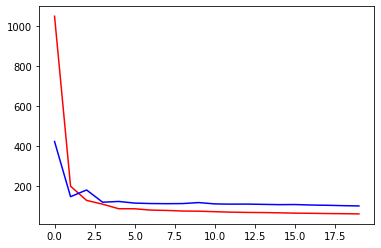

In [73]:
plt.plot(history.history['loss'], c= 'r')
plt.plot(history.history['val_loss'], c= 'b')
plt.show()


In [87]:
(train_input_pre, train_target_pre),(test_input_pre, test_target_pre)=keras.datasets.fashion_mnist.load_data()

In [88]:
train_input.shape #(60000, 28, 28)
test_input.shape #((10000, 28, 28))

(10000, 28, 28)

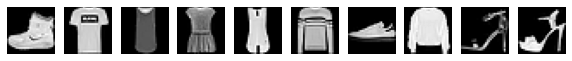

In [92]:
fig, axe = plt.subplots(1,10, figsize = (10,10))

for i in range(10):
  axe[i].imshow(train_input_pre[i], cmap = 'gray')
  axe[i].axis('off')
plt.show()

In [91]:
np.unique(train_target_pre, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [93]:
train_scaled_pre = (train_input_pre/255.0).reshape(-1,28*28)
test_scaled_pre = (test_input_pre/255.0).reshape(-1,28*28)

train_scaled_pre.shape

(60000, 784)

In [94]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled_pre, train_target_pre, test_size = 0.2
)

In [96]:
train_scaled.shape #(48000, 784)
train_target.shape #(48000,)

(48000,)

In [106]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))  # 10개 output이니까 softmax

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 100)               78500     
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.compile(loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy',
              optimizer = 'adam')

history = model.fit(train_scaled, train_target, 
                    validation_data = (val_scaled, val_target), 
                                       epochs = 500, batch_size = 500)

Epoch 1/500
96/96 [==============================] - 1s 7ms/step - loss: 0.7342 - accuracy: 0.7554 - val_loss: 0.5218 - val_accuracy: 0.8202
Epoch 2/500
96/96 [==============================] - 1s 5ms/step - loss: 0.4843 - accuracy: 0.8342 - val_loss: 0.4575 - val_accuracy: 0.8430
Epoch 3/500
96/96 [==============================] - 1s 7ms/step - loss: 0.4395 - accuracy: 0.8503 - val_loss: 0.4271 - val_accuracy: 0.8517
Epoch 4/500
96/96 [==============================] - 1s 6ms/step - loss: 0.4161 - accuracy: 0.8566 - val_loss: 0.4149 - val_accuracy: 0.8558
Epoch 5/500
96/96 [==============================] - 1s 6ms/step - loss: 0.3954 - accuracy: 0.8634 - val_loss: 0.3908 - val_accuracy: 0.8622
Epoch 6/500
96/96 [==============================] - 1s 6ms/step - loss: 0.3793 - accuracy: 0.8690 - val_loss: 0.3883 - val_accuracy: 0.8616
Epoch 7/500
96/96 [==============================] - 1s 6ms/step - loss: 0.3645 - accuracy: 0.8724 - val_loss: 0.3809 - val_accuracy: 0.8654
Epoch 8/500
9

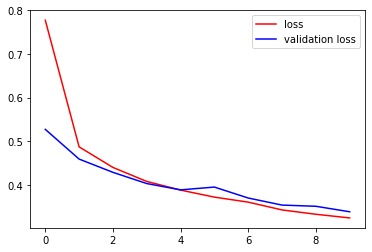

In [105]:
# epoch 10? (여튼작음)
plt.plot(history.history['loss'], c = 'r', label = 'loss')
plt.plot(history.history['val_loss'], c = 'b', label = 'validation loss')
plt.legend()
plt.show()

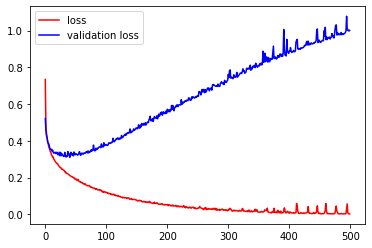

In [108]:
## epoch 500일때 validation 벌어지는지 확인 (overfitting)
plt.plot(history.history['loss'], c = 'r', label = 'loss')
plt.plot(history.history['val_loss'], c = 'b', label = 'validation loss')
plt.legend()
plt.show()

In [113]:
#model을 함수로 정의

def model_fn(a_layer = None, name = None):
  model = keras.Sequential(name = name)
  model.add(keras.layers.Flatten(input_shape = (784,)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

my_fun = model_fn()
my_fun.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               78500     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
